In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pickle

In [2]:
df = pd.read_csv('/content/LoanApprovalPrediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.drop(['Loan_ID'], axis = 1, inplace = True)

In [6]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [20]:
object_cols = df.select_dtypes(include = 'object').columns
print(f'Categorical features : {len(object_cols)}')

Categorical features : 6


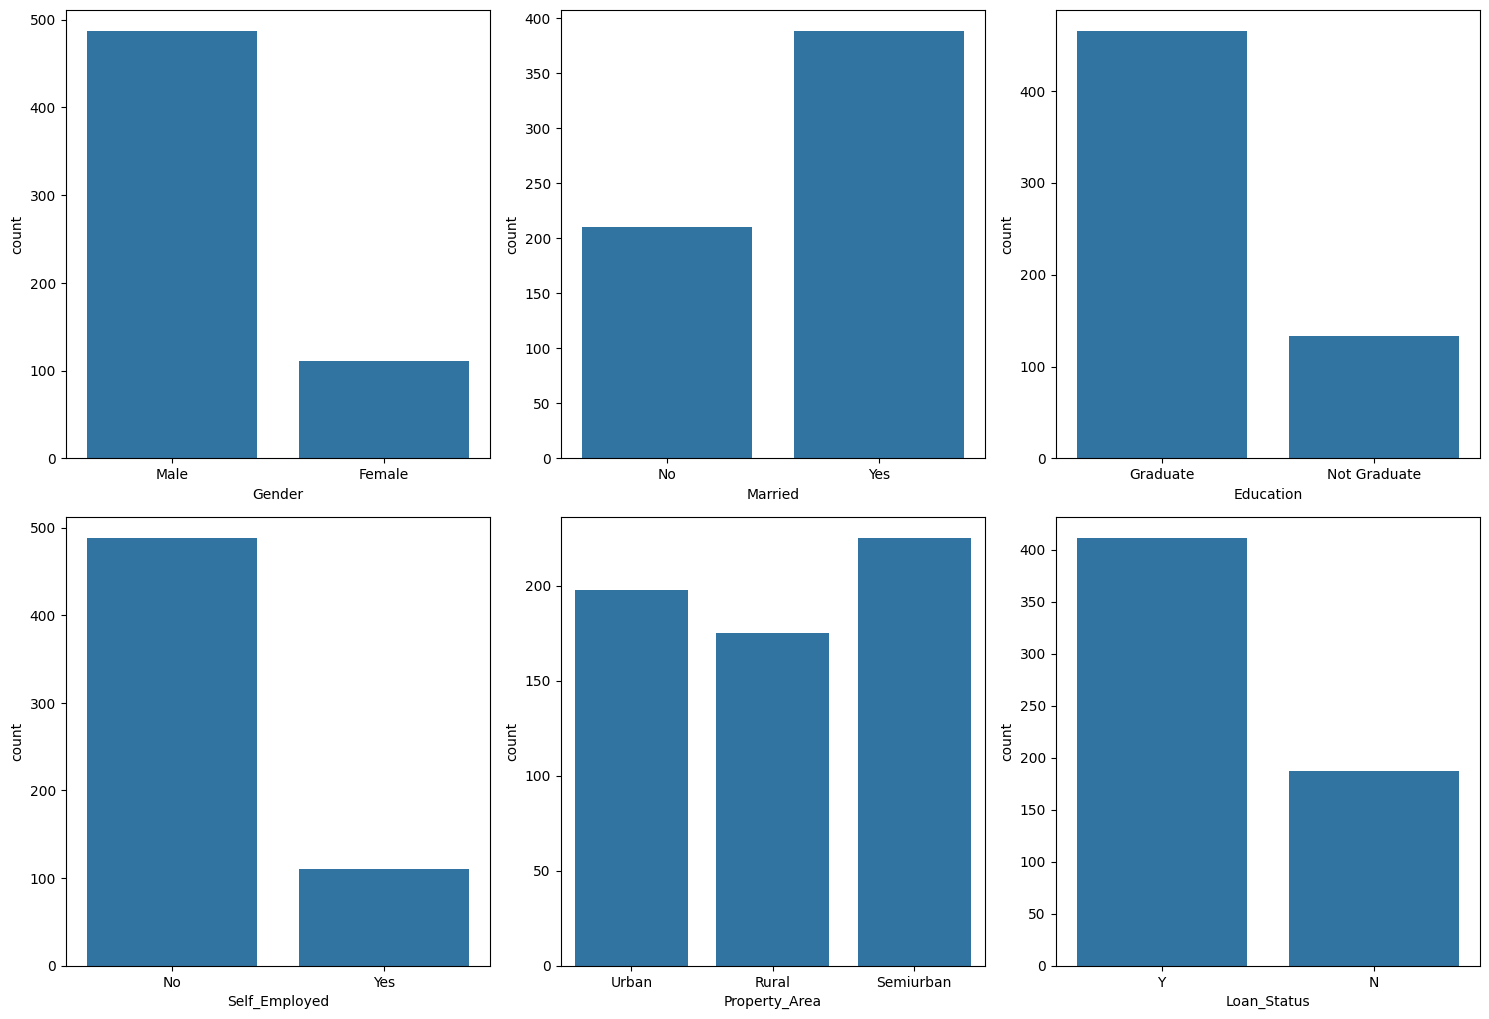

In [25]:
object_cols = df.select_dtypes(include = 'object').columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(object_cols):
    plt.subplot(4, 3, i+1)
    sns.countplot(data=df, x=col)
plt.tight_layout()
plt.show()

In [27]:
encoders = {}
for column in object_cols:
  encoder = LabelEncoder()
  df[column] = encoder.fit_transform(df[column])
  encoders[column] = encoder

with open('encoder.pkl', 'wb') as f:
  pickle.dump(encoders, f)

In [28]:
encoders

{'Gender': LabelEncoder(),
 'Married': LabelEncoder(),
 'Education': LabelEncoder(),
 'Self_Employed': LabelEncoder(),
 'Property_Area': LabelEncoder(),
 'Loan_Status': LabelEncoder()}

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


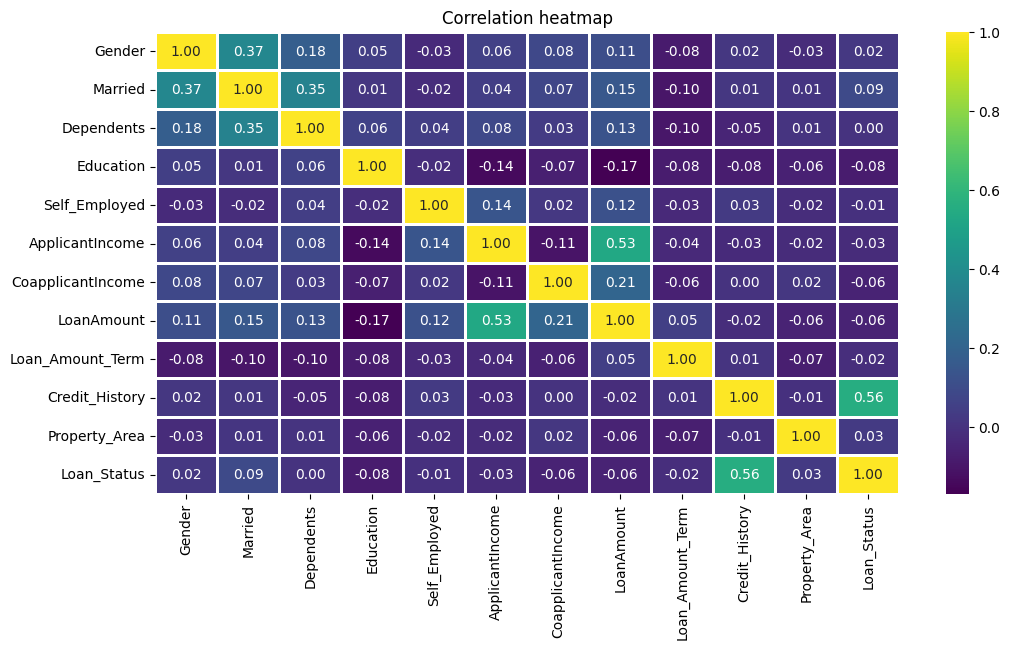

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cbar= True, linewidths= 2, cmap = 'viridis')
plt.title('Correlation heatmap')
plt.savefig('Correlation heatmap')
plt.show()

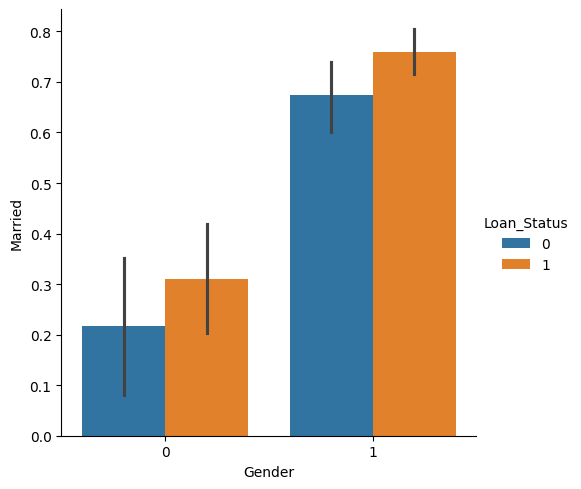

In [40]:
sns.catplot(data = df, x = 'Gender', y = 'Married', hue = 'Loan_Status', kind = 'bar')
plt.savefig('Catplot')
plt.show()

In [41]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14
Credit_History,49


In [42]:
for col in df.columns:
  df[col] = df[col].fillna(df[col].mean())

In [46]:
df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [48]:
X = df.drop(['Loan_Status'], axis = 1)
Y = df['Loan_Status']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 1)

In [50]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [69]:
knn = KNeighborsClassifier(n_neighbors= 3)
rfc = RandomForestClassifier(n_estimators = 7, criterion= 'entropy', random_state = 7)
svc = SVC(C=1.0, kernel='rbf')
lr = LogisticRegression(max_iter=1000, solver='liblinear')

In [70]:
for clf in (rfc, knn, svc, lr):
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_test)
  print('accuracy score of ', clf.__class__.__name__, ' = ', 100 * accuracy_score(Y_test, Y_pred))

accuracy score of  RandomForestClassifier  =  82.5
accuracy score of  KNeighborsClassifier  =  63.74999999999999
accuracy score of  SVC  =  69.16666666666667
accuracy score of  LogisticRegression  =  82.91666666666667
